In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

## regression model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

## classification model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Random Forest Classification

In [37]:
def random_forest_classification(train_X, train_y, test_X, test_y):
    model = RandomForestClassifier(n_estimators = 100,random_state = 1)
    model.fit(train_X, train_y)
    predict = model.predict(test_X)
    
    classification_evaluation(test_y, predict, "random_forest")

## Decision Tree Classification

In [38]:
def decision_tree_classification(train_X, train_y, test_X, test_y):
    model = DecisionTreeClassifier()
    model.fit(train_X, train_y)
    predict = model.predict(test_X)
    
    classification_evaluation(test_y, predict, "decision_tree")

## Gaussian Naive Bayes

In [39]:
def gaussian_naive_bayes(train_X, train_y, test_X, test_y):
    model = GaussianNB()
    model.fit(train_X, train_y)
    predict = model.predict(test_X)
    
    classification_evaluation(test_y, predict, "gaussian_naive_bayes")

## Support Vector Machine

In [40]:
def support_vector_machine(train_X, train_y, test_X, test_y):
    model = SVC(random_state = 1)
    model.fit(train_X, train_y)
    predict = model.predict(test_X)
    
    classification_evaluation(test_y, predict, "support_vector_machine")

## Logistic Regression

In [41]:
def logistic_regression(train_X, train_y, test_X, test_y):
    model = LogisticRegression()
    model.fit(train_X, train_y)
    predict = model.predict(test_X)
    
    classification_evaluation(test_y, predict, "logistic_regression")

## Classification Evaluation

In [42]:
def classification_evaluation(test_y, predict, name):
    print("accuracy: ", round(accuracy_score(test_y, predict), 4))
    print("precision_score: ", precision_score(test_y, predict))
    print("recall_score: ", recall_score(test_y, predict))
    print("f1_score: ",f1_score(test_y, predict))
    
    matrix = confusion_matrix(test_y, predict)
    
    plt.figure(figsize=(4, 4))
    sns.heatmap(matrix, annot = True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy_score(test_y, predict), 4))
    plt.title(all_sample_title, size = 15)
    plt.savefig("./www/" + name + "_classification.png")

## Linear Regression

In [43]:
def linear_regression(train_X, train_y, test_X, test_y):
    model = LinearRegression()
    model.fit(train_X, train_y)
    predict = model.predict(test_X)
    train_predict = model.predict(train_X)
    
    regression_evaluation(train_y, train_predict, test_y, predict, "linear_regression")

## Random Forest

In [44]:
def random_forest(train_X, train_y, test_X, test_y):
    model = RandomForestRegressor(n_estimators = 50, random_state = 42)
    model.fit(train_X, train_y)
    predict = model.predict(test_X)
    train_predict = model.predict(train_X)

    regression_evaluation(train_y, train_predict, test_y, predict, "random_forest")

## Decision Tree

In [45]:
def decision_tree(train_X, train_y, test_X, test_y):
    model = DecisionTreeRegressor(random_state = 42)
    model.fit(train_X, train_y)
    predict = model.predict(test_X)
    train_predict = model.predict(train_X)

    regression_evaluation(train_y, train_predict, test_y, predict, "decision_tree")

## Support Vector Regression

In [46]:
def support_vector_regression(train_X, train_y, test_X, test_y):
    model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
    model.fit(train_X, train_y)
    predict = model.predict(test_X)
    train_predict = model.predict(train_X)

    regression_evaluation(train_y, train_predict, test_y, predict, "support_vector_regression")

## Ridge regression

In [47]:
def ridge_regression(train_X, train_y, test_X, test_y):
    model = Ridge(0.08)
    model.fit(train_X, train_y)
    
    predict = model.predict(test_X)
    train_predict = model.predict(train_X)

    regression_evaluation(train_y, train_predict, test_y, predict, "ridge_regression")

## Regression Evaluation

In [48]:
def regression_evaluation(train_y, train_predict, test_y, predict, name):
    print("r_square score (train dataset): ", round(r2_score(train_y, train_predict), 3))
    print("r_square score (test dataset): ", round(r2_score(test_y, predict), 3))
    print("RMSE (train dataset): ", round(mean_squared_error(train_y, train_predict), 3))
    print("RMSE (test dataset): ", round(mean_squared_error(test_y, predict), 3))
    print("MAE(train dataset): ", round(mean_absolute_error(train_y, train_predict), 3))
    print("MAE(test dataset): ", round(mean_absolute_error(test_y, predict), 3))
    
    fig, ax = plt.subplots()
    ax.scatter(test_y, predict)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predict')
    plt.savefig("./www/" + name + ".png")
    plt.show()

## Reading Data

In [49]:
raw_data = pd.read_csv("./Admission_Predict_Ver1.1.csv")

In [50]:
raw_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [51]:
raw_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Rename Column

In [52]:
raw_data.set_index('Serial No.', inplace=True)
raw_data.index.name = "No"

In [53]:
raw_data = raw_data.rename(columns = {'Chance of Admit ': 'Chance', \
                                      'GRE Score': 'GRE', \
                                      'TOEFL Score': 'TOEFL', \
                                      'University Rating': 'Rating', \
                                     })
raw_data.head()

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Chance
No,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


## Correlation Plot

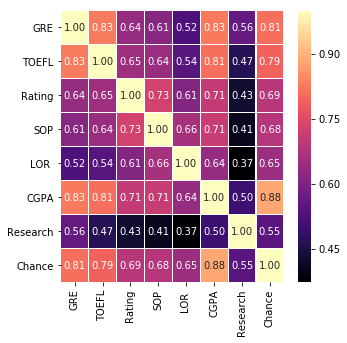

In [61]:
fig,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(raw_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.savefig("./www/correlation.png", bbox_inches='tight')
plt.show()

## Split Data to Training and Testing

In [62]:
y = raw_data["Chance"].values
X = raw_data.drop(["Chance"],axis=1)

In [63]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20, random_state = 42)

## Scaling Data

In [64]:
scaler_X = MinMaxScaler(feature_range = (0, 1))
train_scale_X = scaler_X.fit_transform(train_X.copy())
test_scale_X = scaler_X.transform(test_X.copy())

## PCA

In [65]:
pca = PCA()
train_scale_X = pca.fit_transform(train_scale_X)
test_scale_X = pca.transform(test_scale_X)

## Start Regression Modeling

r_square score (train dataset):  0.821
r_square score (test dataset):  0.819
RMSE (train dataset):  0.004
RMSE (test dataset):  0.004
MAE(train dataset):  0.043
MAE(test dataset):  0.043


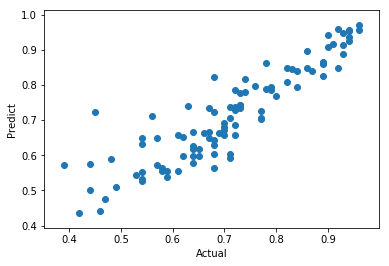

In [66]:
linear_regression(train_scale_X, train_y, test_scale_X, test_y)

r_square score (train dataset):  0.967
r_square score (test dataset):  0.793
RMSE (train dataset):  0.001
RMSE (test dataset):  0.004
MAE(train dataset):  0.018
MAE(test dataset):  0.045


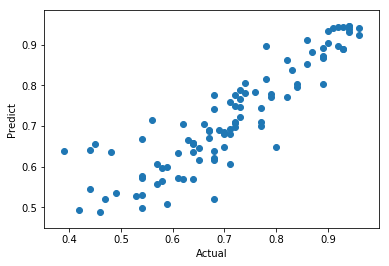

In [67]:
random_forest(train_scale_X, train_y, test_scale_X, test_y)

r_square score (train dataset):  1.0
r_square score (test dataset):  0.623
RMSE (train dataset):  0.0
RMSE (test dataset):  0.008
MAE(train dataset):  0.0
MAE(test dataset):  0.062


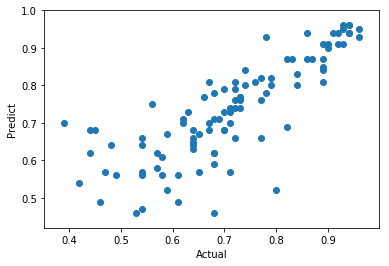

In [68]:
decision_tree(train_scale_X, train_y, test_scale_X, test_y)

r_square score (train dataset):  0.774
r_square score (test dataset):  0.772
RMSE (train dataset):  0.004
RMSE (test dataset):  0.005
MAE(train dataset):  0.056
MAE(test dataset):  0.054


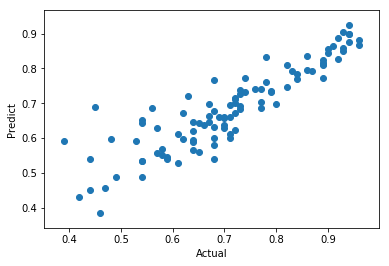

In [69]:
support_vector_regression(train_scale_X, train_y, test_scale_X, test_y)

r_square score (train dataset):  0.821
r_square score (test dataset):  0.819
RMSE (train dataset):  0.004
RMSE (test dataset):  0.004
MAE(train dataset):  0.043
MAE(test dataset):  0.043


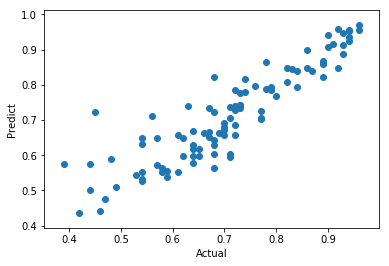

In [70]:
ridge_regression(train_scale_X, train_y, test_scale_X, test_y)

## Start Classification Modeling
#### If a candidate's Chance of Admit is greater than 80%, the candidate will receive the 1 label.
#### If a candidate's Chance of Admit is less than or equal to 80%, the candidate will receive the 0 label.

In [72]:
train_status_y = [1 if possibility > 0.9 else 0 for possibility in train_y]
test_status_y  = [1 if possibility > 0.9 else 0 for possibility in test_y]

train_status_y = np.array(train_status_y)
test_status_y = np.array(test_status_y)

#### Note about score: It is the mean accuracy for test data and labels.
#### Note about precision: precision = TP / (TP + FP)
#### Note about recall: recall = TP / (TP + FN)
#### Note about F1: F1 = 2 / ((1/precision)+(1/recall))

accuracy:  0.95
precision_score:  0.8181818181818182
recall_score:  0.75
f1_score:  0.7826086956521738


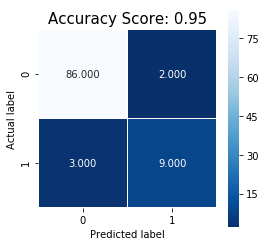

In [73]:
logistic_regression(train_scale_X, train_status_y, test_scale_X, test_status_y)

accuracy:  0.95
precision_score:  0.8181818181818182
recall_score:  0.75
f1_score:  0.7826086956521738


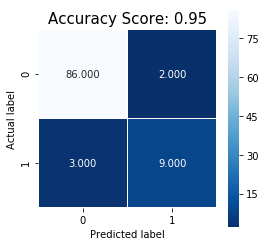

In [74]:
support_vector_machine(train_scale_X, train_status_y, test_scale_X, test_status_y)

accuracy:  0.93
precision_score:  0.6470588235294118
recall_score:  0.9166666666666666
f1_score:  0.7586206896551724


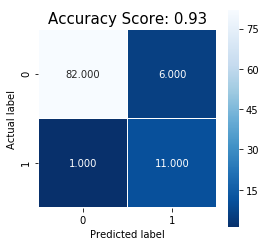

In [75]:
gaussian_naive_bayes(train_scale_X, train_status_y, test_scale_X, test_status_y)

accuracy:  0.93
precision_score:  0.7272727272727273
recall_score:  0.6666666666666666
f1_score:  0.6956521739130435


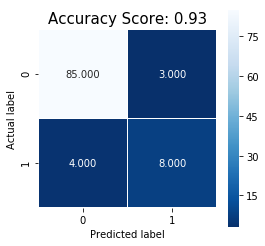

In [76]:
decision_tree_classification(train_scale_X, train_status_y, test_scale_X, test_status_y)

accuracy:  0.95
precision_score:  0.8181818181818182
recall_score:  0.75
f1_score:  0.7826086956521738


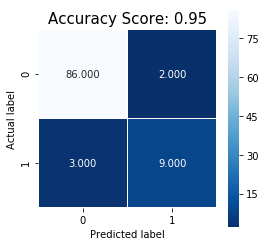

In [77]:
random_forest_classification(train_scale_X, train_status_y, test_scale_X, test_status_y)